# Parsing NetMHCpan 4.1 Output

## Importing modules

In [22]:
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Parsing random peptide scores

In [23]:
#Define a function to parse all binding scores from the file of random peptides
def parse_random_peptide_scores(filename) :
    random_peptide_scores = []
    with open(filename) as file :
        for line in file :
            line = line.rstrip().split()
            if "PEPLIST" in line and "Number" not in line:
                random_peptide_scores.append(float(line[11]))
                
    return random_peptide_scores

## Parsing viral peptide scores and ranks

In [24]:
#Define a function to create a dataframe containing each 9-mer peptide with its binding score and rank
def parse_binding_scores(filename) :
    peptides = []
    binding_scores = []
    ranks = []
    with open(filename) as file :
        for line in file :
            if line.isspace() == True :
                continue
            line = line.rstrip().split()
            if (bool(re.match("\d+", line[0]))) == True and len(line[2]) == 9 :
                peptides.append(line[2])
                binding_scores.append(float(line[11]))
                ranks.append(float(line[12]))
    
    data = {
        "Peptide": peptides,
        "Binding Score": binding_scores,
        "Built-In Rank": ranks
    }
    
    return pd.DataFrame(data)

## Transforming scores to ranks

In [25]:
#Define a function that transforms a list of binding scores into a list of ranks using random peptide scores
def transform_scores(binding_scores, random_peptide_scores) :
    ranks = []
    for score in binding_scores :
        ranks.append(100 - stats.percentileofscore(random_peptide_scores, score))
        
    return ranks

## Parsing files

In [37]:
#Parse random peptides
HLA_A_02_01_random_peptide_scores = parse_random_peptide_scores("Random_peptides_HLA_A_02_01.out")
HLA_A_03_01_random_peptide_scores = parse_random_peptide_scores("Random_peptides_HLA_A_03_01.out")
Patr_A_01_01_random_peptide_scores = parse_random_peptide_scores("Random_peptides_Patr_A_01_01.out")

#Create empty dataframes with the correct columns
empty_df_columns = {
    "Peptide": [],
    "Binding Score": [],
    "Built-In Rank": []
}

HLA_A_02_01_df = pd.DataFrame(empty_df_columns)
HLA_A_03_01_df = pd.DataFrame(empty_df_columns)
Patr_A_01_01_df = pd.DataFrame(empty_df_columns)

#Parse each virus file and append them to the dataframes
viruses = ["Western_lowland_gorilla_simian_foamy_virus", "Torque_teno_hominid_virus_1", "Alphapolyomavirus_gorillae", "Primate_bocaparvovirus_1", "Human_mastadenovirus_B", "Simian_immunodeficiency_virus_1", "Hepatitis_B_virus", "Human_metapneumovirus", "Torque_teno_virus_23", "Chimpanzee_associated_circovirus_1", "Chimpanzee_associated_cyclovirus_1", "Chimpanzee_associated_porprismacovirus_1", "Chimpanzee_faeces_associated_circular_DNA_virus_1", "Panine_alphaherpesvirus_3", "Primate_T-lymphotropic_virus", "Monkeypox_virus", "Rhinovirus_A"]

for virus in viruses :
    HLA_A_02_01_df = pd.concat([HLA_A_02_01_df, parse_binding_scores(virus + "_HLA_A_02_01.out")], ignore_index=True)
    HLA_A_03_01_df = pd.concat([HLA_A_03_01_df, parse_binding_scores(virus + "_HLA_A_03_01.out")], ignore_index=True)
    Patr_A_01_01_df = pd.concat([Patr_A_01_01_df, parse_binding_scores(virus + "_Patr_A_01_01.out")], ignore_index=True)

In [38]:
HLA_A_02_01_df['Computed Rank'] = transform_scores(list(HLA_A_02_01_df.iloc[:,1]), HLA_A_02_01_random_peptide_scores)
HLA_A_03_01_df['Computed Rank'] = transform_scores(list(HLA_A_03_01_df.iloc[:,1]), HLA_A_03_01_random_peptide_scores)
Patr_A_01_01_df['Computed Rank'] = transform_scores(list(Patr_A_01_01_df.iloc[:,1]), Patr_A_01_01_random_peptide_scores)

          Peptide  Binding Score  Built-In Rank  Computed Rank
0       MDTYEEEES       0.000002         90.000        92.9465
1       DTYEEEESV       0.016793          5.204         9.3380
2       TYEEEESVA       0.000121         38.800        51.1085
3       YEEEESVAS       0.000089         43.000        55.0545
4       EEEESVAST       0.000055         49.500        61.2775
...           ...            ...            ...            ...
131922  PYDLLKHEW       0.000166         34.857        47.0245
131923  YDLLKHEWY       0.000015         68.333        76.7660
131924  DLLKHEWYE       0.000572         22.185        32.4690
131925  LLKHEWYEK       0.000740         20.080        29.7695
131926  LKHEWYEKF       0.000162         35.154        47.3485

[131927 rows x 4 columns]
          Peptide  Binding Score  Built-In Rank  Computed Rank
0       MDTYEEEES       0.000001         95.000        97.7660
1       DTYEEEESV       0.000134         30.364        44.9110
2       TYEEEESVA       0.00

## Plotting and Correlation

Spearman correlation HLA-A*02:01 - SpearmanrResult(correlation=0.9999999999116542, pvalue=0.0)
Spearman correlation HLA-A*03:01 - SpearmanrResult(correlation=0.9999999999107304, pvalue=0.0)
Spearman correlation Patr-A*01:01 - SpearmanrResult(correlation=0.9999999999131144, pvalue=0.0)


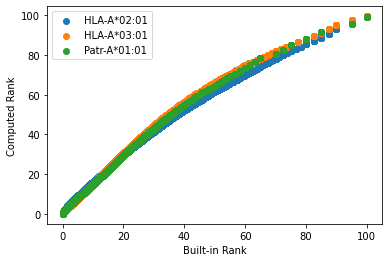

In [43]:
#Plot of built-in rank against computed rank and computing Spearman correlation
plt.scatter(list(HLA_A_02_01_df.iloc[:,2]), list(HLA_A_02_01_df.iloc[:,3]), label="HLA-A*02:01")
plt.scatter(list(HLA_A_03_01_df.iloc[:,2]), list(HLA_A_03_01_df.iloc[:,3]), label="HLA-A*03:01")
plt.scatter(list(Patr_A_01_01_df.iloc[:,2]), list(Patr_A_01_01_df.iloc[:,3]), label="Patr-A*01:01")
plt.xlabel("Built-in Rank")
plt.ylabel("Computed Rank")
plt.legend()

print("Spearman correlation HLA-A*02:01 - " + str(stats.spearmanr(list(HLA_A_02_01_df.iloc[:,2]), list(HLA_A_02_01_df.iloc[:,3]))))
print("Spearman correlation HLA-A*03:01 - " + str(stats.spearmanr(list(HLA_A_03_01_df.iloc[:,2]), list(HLA_A_03_01_df.iloc[:,3]))))
print("Spearman correlation Patr-A*01:01 - " + str(stats.spearmanr(list(Patr_A_01_01_df.iloc[:,2]), list(Patr_A_01_01_df.iloc[:,3]))))